In [252]:
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

## Read the data set

In [253]:
# Read QB career statistics
qb_data = pandas.read_csv("Career_Stats_Passing.csv")
qb_data.infer_objects().dtypes

Player Id                          object
Name                               object
Position                           object
Year                                int64
Team                               object
Games Played                        int64
Passes Attempted                   object
Passes Completed                   object
Completion Percentage              object
Pass Attempts Per Game            float64
Passing Yards                      object
Passing Yards Per Attempt          object
Passing Yards Per Game             object
TD Passes                          object
Percentage of TDs per Attempts     object
Ints                               object
Int Rate                           object
Longest Pass                       object
Passes Longer than 20 Yards        object
Passes Longer than 40 Yards        object
Sacks                              object
Sacked Yards Lost                  object
Passer Rating                     float64
dtype: object

In [254]:
# qb_data.dropna(inplace=True)

In [255]:
# Columns
print(qb_data.columns)

Index(['Player Id', 'Name', 'Position', 'Year', 'Team', 'Games Played',
       'Passes Attempted', 'Passes Completed', 'Completion Percentage',
       'Pass Attempts Per Game', 'Passing Yards', 'Passing Yards Per Attempt',
       'Passing Yards Per Game', 'TD Passes', 'Percentage of TDs per Attempts',
       'Ints', 'Int Rate', 'Longest Pass', 'Passes Longer than 20 Yards',
       'Passes Longer than 40 Yards', 'Sacks', 'Sacked Yards Lost',
       'Passer Rating'],
      dtype='object')


In [256]:
# Num rows & columns
qb_data.shape

(8525, 23)

## Fix column names

In [257]:
qb_data.columns = qb_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# print new columns names
qb_data.columns

Index(['player_id', 'name', 'position', 'year', 'team', 'games_played',
       'passes_attempted', 'passes_completed', 'completion_percentage',
       'pass_attempts_per_game', 'passing_yards', 'passing_yards_per_attempt',
       'passing_yards_per_game', 'td_passes', 'percentage_of_tds_per_attempts',
       'ints', 'int_rate', 'longest_pass', 'passes_longer_than_20_yards',
       'passes_longer_than_40_yards', 'sacks', 'sacked_yards_lost',
       'passer_rating'],
      dtype='object')

## Trim the Data

First, let's trim the data to look at only the most recent years

In [259]:
# Drop columns that we don't care
qb_data.drop(['player_id', 'int_rate'], axis=1)

# Select only the most recent year
qb_data = qb_data[qb_data.year == 2016]

# Remove QBs who haven't played enough games
qb_data = qb_data[qb_data.games_played >= 8]

# Remove QBs who haven't played enough games
qb_data = qb_data[qb_data.position == 'QB']

# Let's check what the shape is now
qb_data.shape

(34, 23)

## Analysis - QB Efficiency

Let's look at the following stats:

1. pass completion rate
2. total TDs
3. TDs per attempts
4. interception rate
5. passer rating

### Pass Completion Rate


In [260]:
accurate_qbs = qb_data.sort_values(by=['completion_percentage'], ascending=False)[:10]
accurate_qbs.completion_percentage = accurate_qbs.completion_percentage.astype('float64', copy=False)

In [261]:
accurate_qbs.head()

,player_id,name,position,year,team,games_played,passes_attempted,passes_completed,completion_percentage,pass_attempts_per_game,...,td_passes,percentage_of_tds_per_attempts,ints,int_rate,longest_pass,passes_longer_than_20_yards,passes_longer_than_40_yards,sacks,sacked_yards_lost,passer_rating
5820,sambradford/497095,"Bradford, Sam",QB,2016,Minnesota Vikings,15,552,395,71.6,36.8,...,20,3.6,5,0.9,71T,49,8,37,276,99.3
956,drewbrees/2504775,"Brees, Drew",QB,2016,New Orleans Saints,16,673,471,70.0,42.1,...,37,5.5,15,2.2,98T,70,10,27,184,101.7
3321,mattryan/310,"Ryan, Matt",QB,2016,Atlanta Falcons,16,534,373,69.9,33.4,...,38,7.1,7,1.3,76T,69,17,37,235,117.1
1243,dakprescott/2555260,"Prescott, Dak",QB,2016,Dallas Cowboys,16,459,311,67.8,28.7,...,23,5.0,4,0.9,83T,38,8,25,143,104.9
2577,tombrady/2504211,"Brady, Tom",QB,2016,New England Patriots,12,432,291,67.4,36.0,...,28,6.5,2,0.5,79T,45,8,15,87,112.2


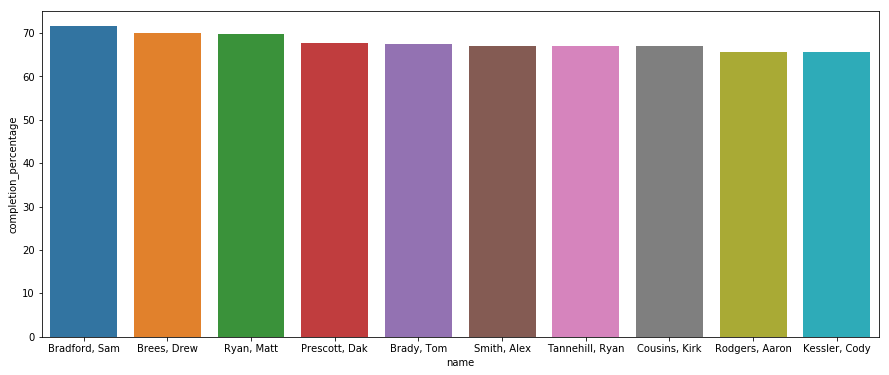

In [262]:
plt.figure(figsize=(15,6))
sns.barplot(x='name', y='completion_percentage', data=accurate_qbs)

### Passing Yards Per Attempt

In [263]:
pass_leaning_qbs = qb_data.sort_values(by=['passing_yards_per_attempt'], ascending=False)[:10]
pass_leaning_qbs.passing_yards_per_attempt = pass_leaning_qbs.passing_yards_per_attempt.astype('float64', copy=False)

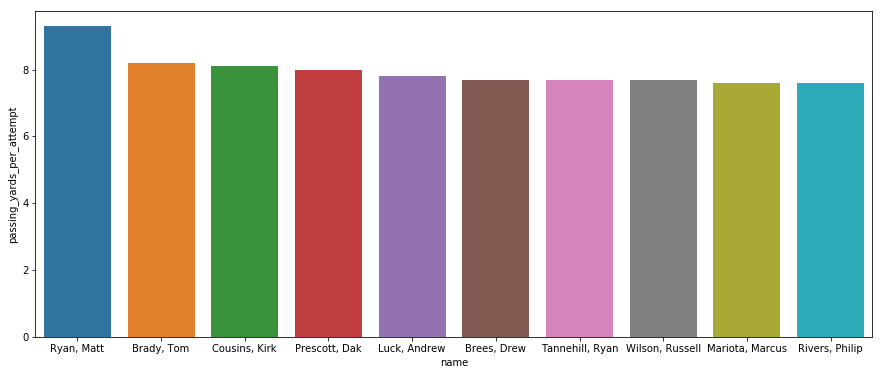

In [264]:
plt.figure(figsize=(15,6))
sns.barplot(x='name', y='passing_yards_per_attempt', data=pass_leaning_qbs)

### Total TDs

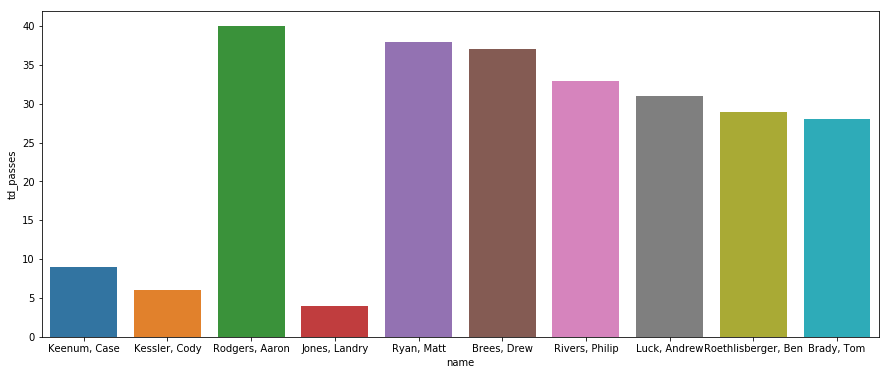

In [282]:
# 
# scoring_qbs.sort_values(by='td_passes', ascending=False).head(10)
scoring_qbs = qb_data.sort_values(by='td_passes', ascending=False)[:10]
scoring_qbs.td_passes = scoring_qbs.td_passes.astype('float64', copy=False)

plt.figure(figsize=(15,6))
sns.barplot(x='name', y='td_passes', data=scoring_qbs)